In [1]:
# Import Libraries

import tweepy  #An easy-to-use Python library for accessing the Twitter API. 
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
pd.set_option('display.max_colwidth', None)


In [2]:
# Load the data

from google.colab import files
uploaded = files.upload()

Saving TwitterAPI.csv to TwitterAPI.csv


In [3]:
# Get the data


log = pd.read_csv('TwitterAPI.csv')


In [4]:
# Twitter API Credentials

consumerKey = log['key'][0]
consumerSecret = log['key'][1]
accessToken = log['key'][2]
accessTokenSecret = log['key'][3]

In [5]:
 # create authentication object
 
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 

In [6]:
# Set access Token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

In [7]:
# Create the API object while passing in auth info
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [14]:
# extract 100 tweets from twitter user
posts = api.user_timeline(screen_name = "imVkohli", count = 100, lang = "en", tweet_mode = "extended")
print("show the last 100 tweets: \n")
i=1
for tweet in posts[0:100]:
  print(str(i) +  ')'  + tweet.full_text + '\n')
  i = i + 1


show the last 100 tweets: 

1)ਡੂ ਦ ਡਿਜਿਟ ਡਿਜਿਟ!

Every corner of the nation is doing the Digit Dance! @heydigit

When 3 crore people show trust in my Digit for their car, bike, health and travel insurance, I can't help but dance myself!

Just Do the Digit! https://t.co/5h1UsejAGE

#DoTheDigitDigit #ad https://t.co/UeZ2FAdbX7

2)Thank you Leicester ✌️Birmingham awaits ⏳ https://t.co/OC8u6xjECx

3)Explore a scent for every style.
Get the best of #one8 from here- https://t.co/XP5iVjZOak
@ScentialsWorld @one8world
#one8fragrances #ad https://t.co/7kpQ2TfZug

4)Practice well. Stay happy 😃✌ https://t.co/agBgIlCJiV

5)Time flies 🇮🇳
#20June #TestDebut https://t.co/eIktcGLg6i

6)Vamos 🏃‍♂️💪 https://t.co/0KInMFcItR

7)⏳ https://t.co/izpJvs901F

8)Now here’s an energy drink that’s truly out of this world —natural, plant-based energy, glucose, vitamins and a positive charge that doesn’t bring you crashing down to earth in a flash @OceanBeverages
Available @ your nearest stores &amp; leading e-comm

In [12]:
# create a dataframe with a column called tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns = ['tweets'])


df.index
df.index+=1      # for starting index of dataframe from 1 instead of 0
df

,tweets
1,"ਡੂ ਦ ਡਿਜਿਟ ਡਿਜਿਟ!\n\nEvery corner of the nation is doing the Digit Dance! @heydigit\n\nWhen 3 crore people show trust in my Digit for their car, bike, health and travel insurance, I can't help but dance myself!\n\nJust Do the Digit! https://t.co/5h1UsejAGE\n\n#DoTheDigitDigit #ad https://t.co/UeZ2FAdbX7"
2,Thank you Leicester ✌️Birmingham awaits ⏳ https://t.co/OC8u6xjECx
3,Explore a scent for every style.\nGet the best of #one8 from here- https://t.co/XP5iVjZOak\n@ScentialsWorld @one8world\n#one8fragrances #ad https://t.co/7kpQ2TfZug
4,Practice well. Stay happy 😃✌ https://t.co/agBgIlCJiV
5,Time flies 🇮🇳\n#20June #TestDebut https://t.co/eIktcGLg6i
...,...
96,🔜 T20s \n#TeamIndia 🇮🇳 https://t.co/3nMemcxT88
97,My tribute to the martyrs and the families of the Pulwama attack. Always in our hearts. 🙏
98,Top win. Looking forward to the t20s now. https://t.co/GSHiKm4bGQ
99,Another win in the bag! 🇮🇳 https://t.co/h40HvHLYI7


In [13]:
# Clean the tweet

# Create a function to clean tweets
def cleanTxt(text):
  text = re.sub(r'@[A-Z a-z 0-9]+', '', text)
  text = re.sub(r'#+', '', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'https?://\S+', '', text)
  return text

# cleaning the text
df['tweets'] = df['tweets'].apply(cleanTxt)

# Show the cleaned tweets

df





,tweets
1,"ਡੂ ਦ ਡਿਜਿਟ ਡਿਜਿਟ!\n\nEvery corner of the nation is doing the Digit Dance! \n\nWhen 3 crore people show trust in my Digit for their car, bike, health and travel insurance, I can't help but dance myself!\n\nJust Do the Digit! \n\nDoTheDigitDigit ad"
2,Thank you Leicester ✌️Birmingham awaits ⏳
3,Explore a scent for every style.\nGet the best of one8 from here- \n\none8fragrances ad
4,Practice well. Stay happy 😃✌
5,Time flies 🇮🇳\n20June TestDebut
...,...
96,🔜 T20s \nTeamIndia 🇮🇳
97,My tribute to the martyrs and the families of the Pulwama attack. Always in our hearts. 🙏
98,Top win. Looking forward to the t20s now.
99,Another win in the bag! 🇮🇳


In [15]:


#Createafunction to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Createafunction to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#Create two new columns
df['Subjectivity'] = df['tweets'].apply(getSubjectivity)
df['Polarity'] = df['tweets'].apply(getPolarity)

#Show the new dataframe with the new columns
df

,tweets,Subjectivity,Polarity
1,"ਡੂ ਦ ਡਿਜਿਟ ਡਿਜਿਟ!\n\nEvery corner of the nation is doing the Digit Dance! \n\nWhen 3 crore people show trust in my Digit for their car, bike, health and travel insurance, I can't help but dance myself!\n\nJust Do the Digit! \n\nDoTheDigitDigit ad",0.000,0.00
2,Thank you Leicester ✌️Birmingham awaits ⏳,0.000,0.00
3,Explore a scent for every style.\nGet the best of one8 from here- \n\none8fragrances ad,0.300,1.00
4,Practice well. Stay happy 😃✌,1.000,0.80
5,Time flies 🇮🇳\n20June TestDebut,0.000,0.00
...,...,...,...
96,🔜 T20s \nTeamIndia 🇮🇳,0.000,0.00
97,My tribute to the martyrs and the families of the Pulwama attack. Always in our hearts. 🙏,0.000,0.00
98,Top win. Looking forward to the t20s now.,0.450,0.65
99,Another win in the bag! 🇮🇳,0.400,1.00


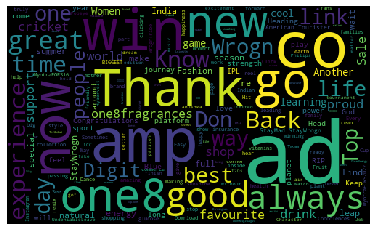

In [16]:
allWords = ' '.join([twts for twts in df['tweets']])
wordcloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordcloud, interpolation = 'none')
plt.axis('off')
plt.show()

In [17]:
# create function to find -ve +ve or neutral

def getAnalysis(score):
  if score<0:
    return "negative"
  elif score == 0:
    return "Neutral"
  else:
    return "Positive"

df['Analysis'] = df['Polarity'].apply(getAnalysis)

# show the dataframe
df

,tweets,Subjectivity,Polarity,Analysis
1,"ਡੂ ਦ ਡਿਜਿਟ ਡਿਜਿਟ!\n\nEvery corner of the nation is doing the Digit Dance! \n\nWhen 3 crore people show trust in my Digit for their car, bike, health and travel insurance, I can't help but dance myself!\n\nJust Do the Digit! \n\nDoTheDigitDigit ad",0.000,0.00,Neutral
2,Thank you Leicester ✌️Birmingham awaits ⏳,0.000,0.00,Neutral
3,Explore a scent for every style.\nGet the best of one8 from here- \n\none8fragrances ad,0.300,1.00,Positive
4,Practice well. Stay happy 😃✌,1.000,0.80,Positive
5,Time flies 🇮🇳\n20June TestDebut,0.000,0.00,Neutral
...,...,...,...,...
96,🔜 T20s \nTeamIndia 🇮🇳,0.000,0.00,Neutral
97,My tribute to the martyrs and the families of the Pulwama attack. Always in our hearts. 🙏,0.000,0.00,Neutral
98,Top win. Looking forward to the t20s now.,0.450,0.65,Positive
99,Another win in the bag! 🇮🇳,0.400,1.00,Positive


In [18]:
# print all positive tweets
j=1
sortedDF = df.sort_values(by = ['Polarity'])
for i in range(1, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Positive'):
    # print(str(j) + ') ' + sortedDF['tweets'][i])
    # print()
    j+=1
print(j)

55


In [19]:
# print all negative tweets
j=0
sortedDF = df.sort_values(by = ['Polarity'],ascending = 'False')
for i in range(1, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'negative'):
    # print(str(j) + ') ' + sortedDF['tweets'][i])
    # print()
    j+=1
print(j)

9


In [20]:
j=0
sortedDF = df.sort_values(by = ['Polarity'])
for i in range(1, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Neutral'):
    # print(str(j) + ') ' + sortedDF['tweets'][i])
    # print()
    j+=1

print(j)

36


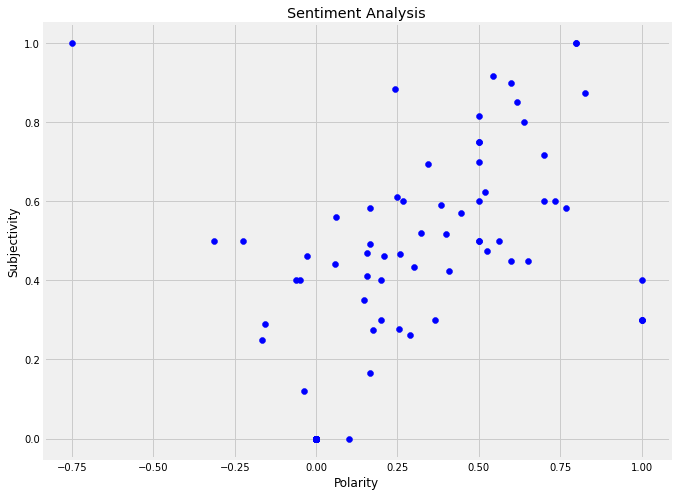

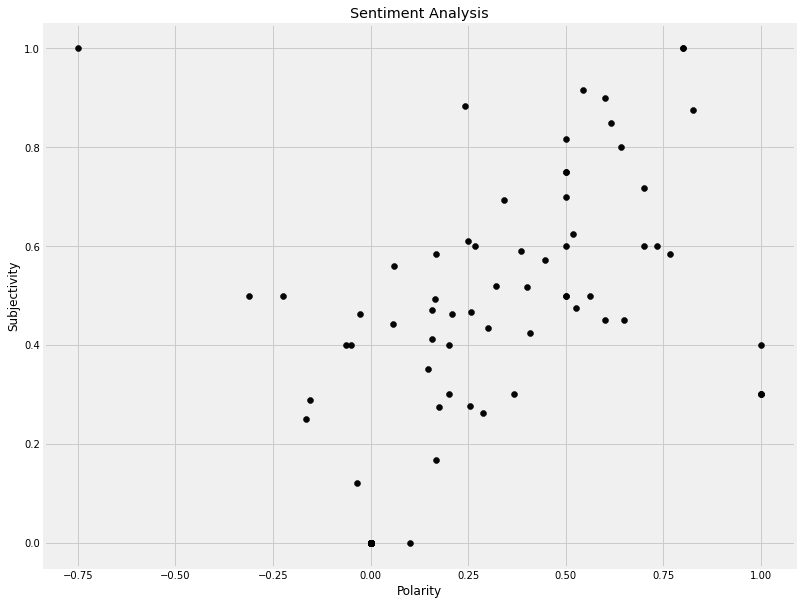

In [21]:
#Plot the polarity and subjectivity
plt.figure(figsize=(10,8))
for i in range(1,df.shape[0]):
 plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')
   
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

plt.figure(figsize=(12,10))
# colors = np.random.rand(200)
for i in range(1,df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='black',alpha=0.98)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [22]:
# percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['tweets']
round(ptweets.shape[0]/df.shape[0]*100, 1)
print(ptweets.shape[0])

55


In [23]:
# percentage of negative tweets
ntweets = df[df.Analysis == 'negative']
ntweets = ntweets['tweets']
round(ntweets.shape[0]/df.shape[0]*100, 1)

9.0

In [24]:
# percentage of neutral tweets
neutraltweets = df[df.Analysis == 'Neutral']
neutraltweets = neutraltweets['tweets']
round(neutraltweets.shape[0]/df.shape[0]*100, 1)

36.0

In [25]:
# show the value counts
df['Analysis'].value_counts()

Positive    55
Neutral     36
negative     9
Name: Analysis, dtype: int64

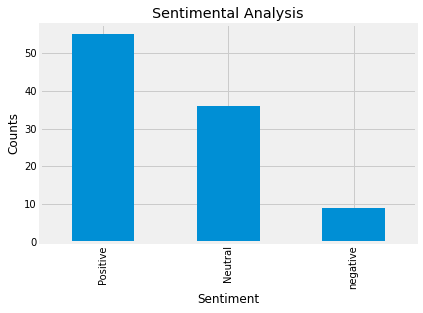

In [26]:
#plot and visualize counts
plt.title("Sentimental Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Counts")
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()